## Use Cross validation for better measures
Use different sets of training set and validation set to evaluate your results.

<u>In general, the larger the validation set, the less randomness (aka "noise") there is in our measure of model quality, and the more reliable it will be.</u> Unfortunately, we can only get a large validation set by removing rows from our training data, and smaller training datasets mean worse models!
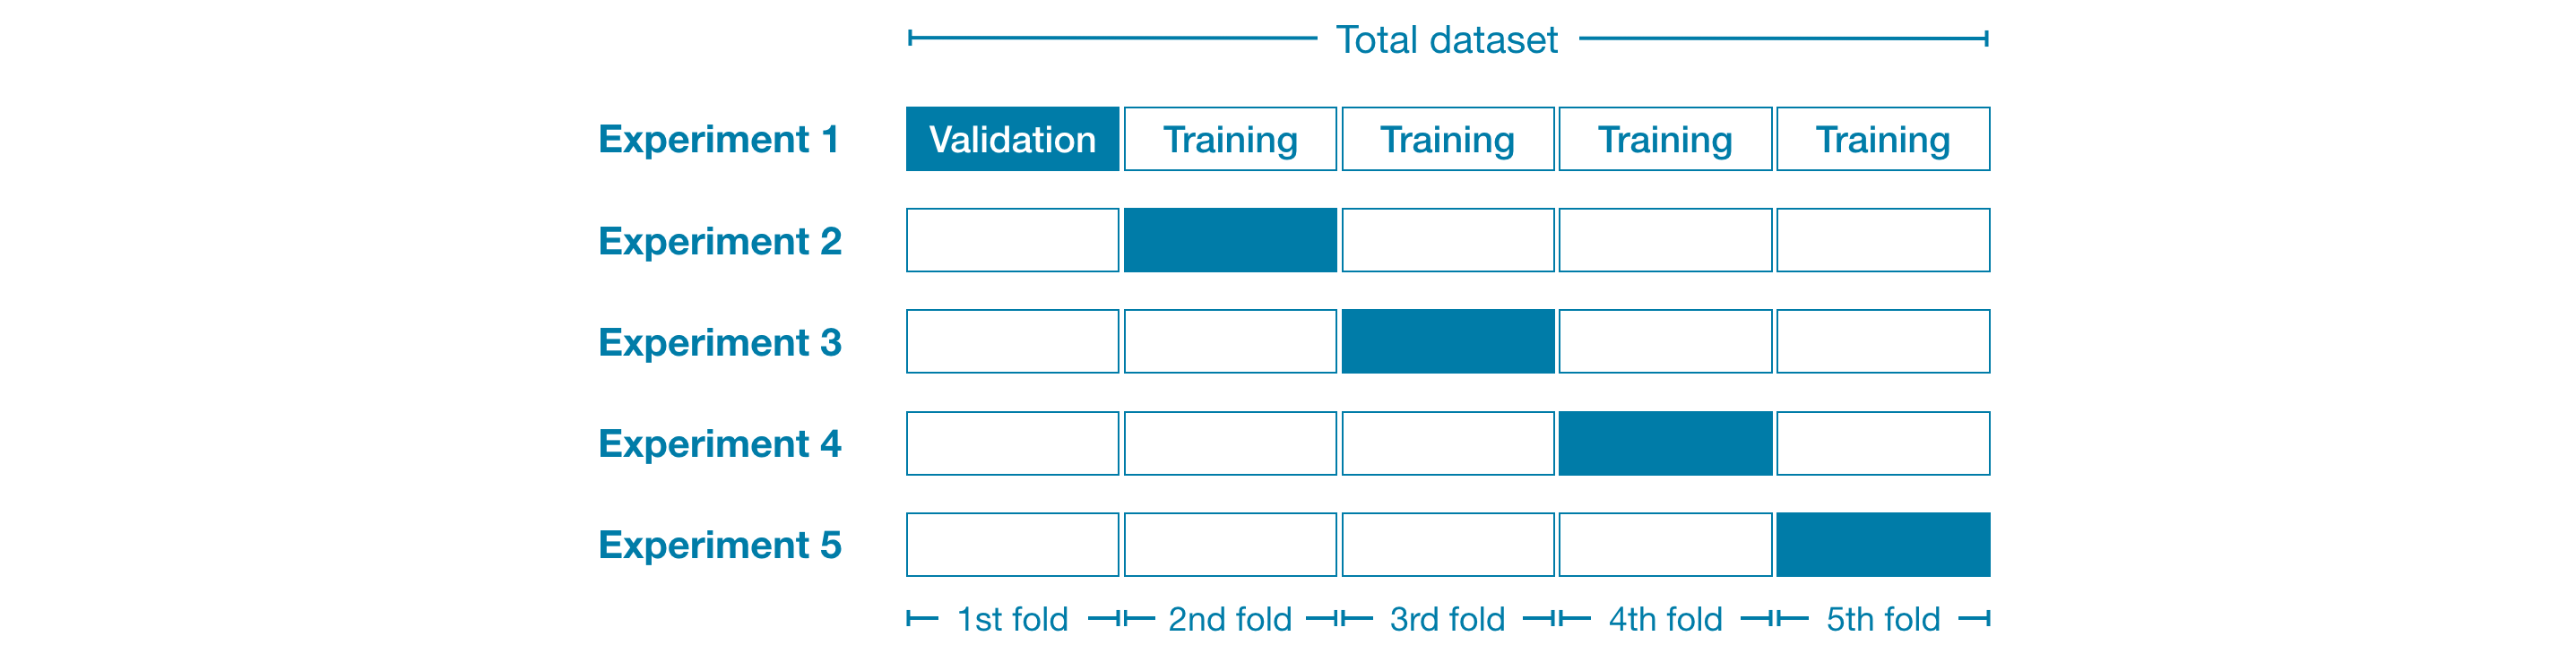

## When to use cross-validation
Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).
* For ***small datasets***, where extra computational burden isn't a big deal, you should run cross-validation.
* For ***larger datasets***, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

In [1]:
import pandas as pd
# Read the data
data = pd.read_csv('./melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select targer 
y = data.Price

Then, we define a pipeline that uses an imputer to fill in missing values and a random forest model to make predictions.

While it's possible to do cross-validation without pipelines, it is quite difficult! Using a pipeline will make the code remarkably straightforward

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[("preprocessor",SimpleImputer())
                             ,("model",RandomForestRegressor(n_estimators=50,random_state=0))
                             ])



We obtain the cross-validation scores with the `cross_val_score()` function from scikit-learn. We set the number of folds with the cv parameter.

In [5]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline,X,y
                             ,cv=5
                             ,scoring='neg_mean_absolute_error')

print("MAE score:\n",scores)

MAE score:
 [301615.03450966 303143.49091344 287316.47967778 236087.57655869
 260385.2736474 ]


The scoring parameter chooses a measure of model quality to report: in this case, we chose negative mean absolute error (MAE). The docs for scikit-learn show a list of options:http://scikit-learn.org/stable/modules/model_evaluation.html.

It is a little surprising that we specify negative MAE. Scikit-learn has a convention where all metrics are defined so a high number is better. Using negatives here allows them to be consistent with that convention, though negative MAE is almost unheard of elsewhere.

We typically want a single measure of model quality to compare alternative models. So we take the average across experiments.

In [6]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
277709.5710613945


Using cross-validation yields a much better measure of model quality, with the added benefit of cleaning up our code: note that we no longer need to keep track of separate training and validation sets. So, especially for small datasets, it's a good improvement!